

Classifying Muffins and Cupcakes with SVM



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('recipes_muffins_cupcakes.csv')
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [ ]:
df.shape

(20, 9)

In [ ]:
df.Type.value_counts()

Muffin     10
Cupcake    10
Name: Type, dtype: int64

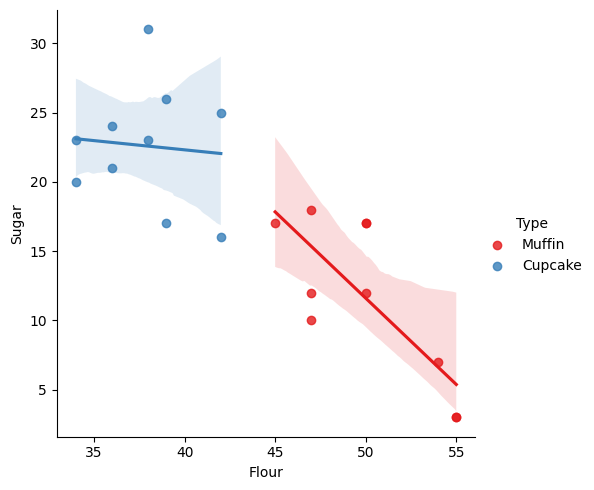

In [ ]:
sns.lmplot(x = 'Flour',y = 'Sugar',data = df,hue = 'Type',palette = 'Set1')

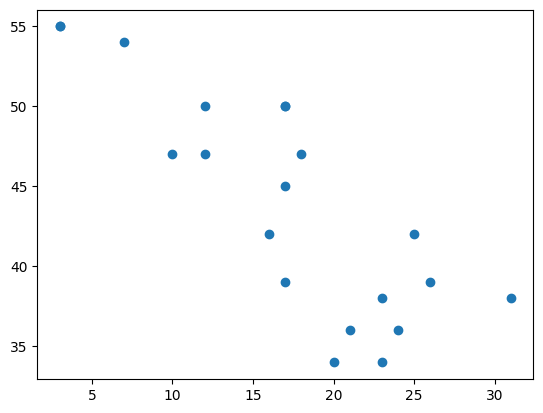

In [ ]:
plt.scatter(df.Sugar,df.Flour)

In [ ]:
X = df[['Flour','Sugar']]
X.head()

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12


In [ ]:
y = df.Type
y.head()

0    Muffin
1    Muffin
2    Muffin
3    Muffin
4    Muffin
Name: Type, dtype: object

In [ ]:
np.where (df['Type']=='Muffin',0,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
df.Type.map({'Muffin':0,'Cupcake':1})

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()
lb

LabelEncoder()

In [ ]:
y = lb.fit_transform(df.Type)
y[:3]

array([1, 1, 1])

In [ ]:
df.Type = y

In [ ]:
df

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,1,55,28,3,7,5,2,0,0
1,1,47,24,12,6,9,1,0,0
2,1,47,23,18,6,4,1,0,0
3,1,45,11,17,17,8,1,0,0
4,1,50,25,12,6,5,2,1,0
5,1,55,27,3,7,5,2,1,0
6,1,54,27,7,5,5,2,0,0
7,1,47,26,10,10,4,1,0,0
8,1,50,17,17,8,6,1,0,0
9,1,50,17,17,11,4,1,0,0


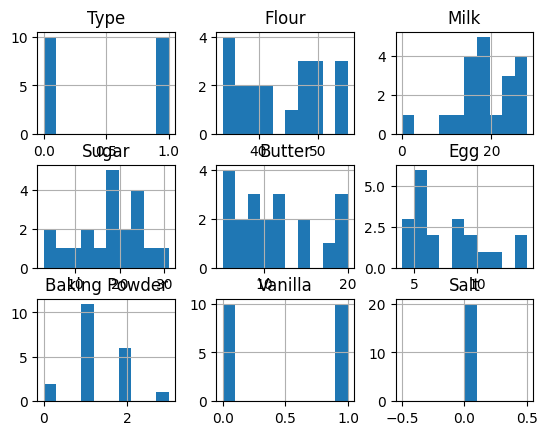

In [ ]:
df.hist()
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

In [ ]:
model.score(X,y)*100

100.0

In [ ]:
model2 = SVC()
model2.fit(X,y)
model2.score(X,y)*100

95.0

In [ ]:
model.predict([[55,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model.predict([[90,100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
sv = model.support_vectors_
sv


array([[42., 16.],
       [42., 25.],
       [45., 17.]])

In [ ]:
sv[:,0]

array([42., 42., 45.])

Text(0, 0.5, 'Sugar')

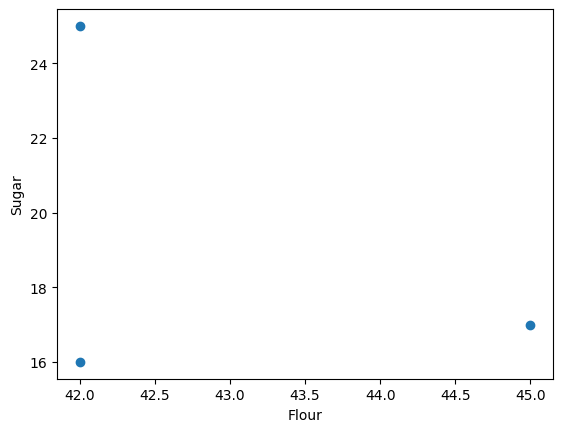

In [ ]:
plt.scatter(sv[:,0],sv[:,1])
plt.xlabel('Flour')
plt.ylabel('Sugar')

In [ ]:
model.support_

array([11, 15,  3], dtype=int32)

In [ ]:
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0] / w[1])

b = model.support_vectors_[0]
yy_down = a *xx + (b[1] - a* b[0])
b = model.support_vectors_[-1]
yy_up = a *xx + (b[1] - a* b[0])

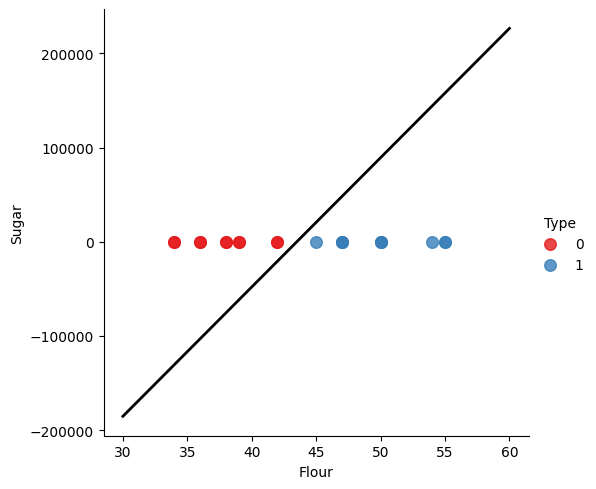

In [ ]:
sns.lmplot(x = 'Flour',y = 'Sugar',data = df, hue = 'Type',palette = 'Set1',fit_reg= False,scatter_kws = {'s' : 70})
plt.plot(xx,yy,linewidth=2,color='black')

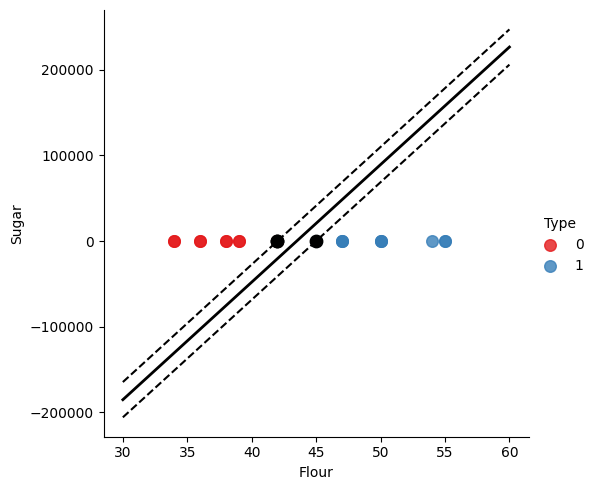

In [ ]:
sns.lmplot(x='Flour',y='Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black')#hyperplane
plt.plot(xx, yy_down, 'k--') #marginLine1
plt.plot(xx, yy_up, 'k--') #margineLine2
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='black');

In [ ]:
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==1:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [ ]:
muffin_or_cupcake(50,20)

You're looking at a muffin recipe!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


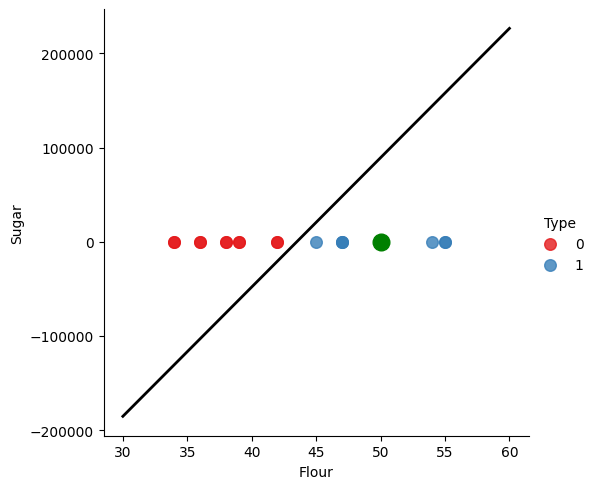

In [ ]:
sns.lmplot(x = 'Flour', y ='Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'go', markersize='12')